# Customer Churn - Group Case Study

In [1]:
# Importing the initial libraries
import pandas as pd
import numpy as np
from scipy import stats
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data into the 'tel_df' object
tel_df = pd.read_csv("telecom_churn_data.csv") 
tel_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Data exploration and cleaning

In [3]:
# check how the data looks like
tel_df.info()

tel_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Now we can clearly see from above stats that there are some columns which have no variance, let's explore this first. 

In [4]:
print(tel_df.nunique()==1)

mobile_number           False
circle_id                True
loc_og_t2o_mou           True
std_og_t2o_mou           True
loc_ic_t2o_mou           True
last_date_of_month_6     True
last_date_of_month_7     True
last_date_of_month_8     True
last_date_of_month_9     True
arpu_6                  False
arpu_7                  False
arpu_8                  False
arpu_9                  False
onnet_mou_6             False
onnet_mou_7             False
onnet_mou_8             False
onnet_mou_9             False
offnet_mou_6            False
offnet_mou_7            False
offnet_mou_8            False
offnet_mou_9            False
roam_ic_mou_6           False
roam_ic_mou_7           False
roam_ic_mou_8           False
roam_ic_mou_9           False
roam_og_mou_6           False
roam_og_mou_7           False
roam_og_mou_8           False
roam_og_mou_9           False
loc_og_t2t_mou_6        False
                        ...  
arpu_2g_9               False
night_pck_user_6        False
night_pck_

In [5]:
# list the columns with single unique value.
tel_df.loc[:, tel_df.nunique()==1].columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [6]:
# listing the unique values in these columns(exclusing dates as their values are understod to be non-variant)
print("circle_id: ", tel_df.circle_id.unique())
print("loc_og_t2o_mou: ", tel_df.loc_og_t2o_mou.unique())
print("std_og_t2o_mou: ", tel_df.std_og_t2o_mou.unique())
print("loc_ic_t2o_mou: ", tel_df.loc_ic_t2o_mou.unique())
print("std_og_t2c_mou_6: ", tel_df.std_og_t2c_mou_6.unique())
print("std_og_t2c_mou_7: ", tel_df.std_og_t2c_mou_7.unique())
print("std_og_t2c_mou_8: ", tel_df.std_og_t2c_mou_8.unique())
print("std_og_t2c_mou_9: ", tel_df.std_og_t2c_mou_9.unique())
print("std_ic_t2o_mou_6: ", tel_df.std_ic_t2o_mou_6.unique())
print("std_ic_t2o_mou_7: ", tel_df.std_ic_t2o_mou_7.unique())
print("std_ic_t2o_mou_8: ", tel_df.std_ic_t2o_mou_8.unique())
print("std_ic_t2o_mou_9: ", tel_df.std_ic_t2o_mou_9.unique())

circle_id:  [109]
loc_og_t2o_mou:  [ 0. nan]
std_og_t2o_mou:  [ 0. nan]
loc_ic_t2o_mou:  [ 0. nan]
std_og_t2c_mou_6:  [nan  0.]
std_og_t2c_mou_7:  [nan  0.]
std_og_t2c_mou_8:  [ 0. nan]
std_og_t2c_mou_9:  [nan  0.]
std_ic_t2o_mou_6:  [nan  0.]
std_ic_t2o_mou_7:  [nan  0.]
std_ic_t2o_mou_8:  [ 0. nan]
std_ic_t2o_mou_9:  [nan  0.]


In [7]:
#checking the percentage of null values in these columns
tel_df.loc[:, tel_df.nunique()==1].isnull().mean() * 100

circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
std_og_t2c_mou_6        3.937039
std_og_t2c_mou_7        3.859039
std_og_t2c_mou_8        5.378054
std_og_t2c_mou_9        7.745077
std_ic_t2o_mou_6        3.937039
std_ic_t2o_mou_7        3.859039
std_ic_t2o_mou_8        5.378054
std_ic_t2o_mou_9        7.745077
dtype: float64

So we have enough evidence that these columns are actually with no variance and therefore are safe to be dropped. 

In [8]:
# Dropping these columns with no variation 
tel_df.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou' ], axis=1, inplace=True)
tel_df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9' ], axis=1, inplace=True)
tel_df.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9' ], axis=1, inplace=True)
tel_df.drop(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9' ], axis=1, inplace=True)

In [9]:
# fetching the percentage of missing values in the columns with NULLs
tel_df.loc[:, tel_df.isna().any()].isnull().mean()*100

onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2f_mou_9       7.745077
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
                        ...    
max_rech

So we have 152 columns in total which have NULLs, let's find out the columns with more than 70% NULLs.

In [10]:
tel_df.loc[:, tel_df.isnull().mean()>=.7].columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

Looking at the above set of columns with more than 70% NULLs it looks like `out of the total customers only about 30% use the data services.`

Before getting into the Imputation, let's focus on reducing the size of the dataset by finding out the High Value Customers. Now, for this we will need to first derive some new features as follows: 

1. First we derive the total amount of data recharge by a customer using `total data recharges x average data recharge amount`
2. After that we will find the total amount spent by a customer using `total data recharge amount + total call recharge amount`
3. Using the total amount spent during good phase(June and July) we will derive the `average recharge amount per customer`

And this will be used to find out the 70th percentile to identify the `HVC`, but before doing all this we have just found out that out of the three existing columns(`total_rech_data_X`, `av_rech_amt_data_X`, `total_rech_amt_X`) we need to use to derive the above features first two columns have NULL values which needs imputing. 

In [11]:
# finding the count of NULL values 
print(tel_df.loc[:, [col for col in tel_df.columns if 'total_rech_data_' in col]].isnull().sum())
print(tel_df.loc[:, [col for col in tel_df.columns if 'av_rech_amt_data_' in col]].isnull().sum())

total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64


As we can clearly see there are exactly equal amount of NULL values in each column(monthwise). Exploring a bit further to be double sure by checking a few more related columns which are also by chance the columns with above 70% NULLs;

In [12]:
print(len(tel_df.loc[(tel_df.total_rech_data_6.isnull() & tel_df.av_rech_amt_data_6.isnull() & tel_df.count_rech_2g_6.isnull() & tel_df.count_rech_3g_6.isnull() & tel_df.max_rech_data_6.isnull() & tel_df.date_of_last_rech_data_6.isnull() & tel_df.arpu_3g_6.isnull() & tel_df.arpu_2g_6.isnull() & tel_df.night_pck_user_6.isnull() & tel_df.fb_user_6.isnull()), :]))
print(len(tel_df.loc[(tel_df.total_rech_data_7.isnull() & tel_df.av_rech_amt_data_7.isnull() & tel_df.count_rech_2g_7.isnull() & tel_df.count_rech_3g_7.isnull() & tel_df.max_rech_data_7.isnull() & tel_df.date_of_last_rech_data_7.isnull() & tel_df.arpu_3g_7.isnull() & tel_df.arpu_2g_7.isnull() & tel_df.night_pck_user_7.isnull() & tel_df.fb_user_7.isnull()), :]))
print(len(tel_df.loc[(tel_df.total_rech_data_8.isnull() & tel_df.av_rech_amt_data_8.isnull() & tel_df.count_rech_2g_8.isnull() & tel_df.count_rech_3g_8.isnull() & tel_df.max_rech_data_8.isnull() & tel_df.date_of_last_rech_data_8.isnull() & tel_df.arpu_3g_8.isnull() & tel_df.arpu_2g_8.isnull() & tel_df.night_pck_user_8.isnull() & tel_df.fb_user_8.isnull()), :]))
print(len(tel_df.loc[(tel_df.total_rech_data_9.isnull() & tel_df.av_rech_amt_data_9.isnull() & tel_df.count_rech_2g_9.isnull() & tel_df.count_rech_3g_9.isnull() & tel_df.max_rech_data_9.isnull() & tel_df.date_of_last_rech_data_9.isnull() & tel_df.arpu_3g_9.isnull() & tel_df.arpu_2g_9.isnull() & tel_df.night_pck_user_9.isnull() & tel_df.fb_user_9.isnull()), :]))

74846
74428
73660
74077


Therefore these are the customers who doesn't use data service at all and hence it is completely safe to impute NULLS with 0 for 9 categories of columns(9x4=36 columns) except for the category `date_of_last_rech_data_X`. 

*Note: This includes two categorical columns `night_pck_user_X` and `fb_user_X` with boolean values 0-No and 1-Yes.*

In [13]:
# creating a list of columns to impute NULLs with 0
impute_cols = [col for col in tel_df.columns if 'total_rech_data_' in col]
impute_cols.extend([col for col in tel_df.columns if 'av_rech_amt_data_' in col])
impute_cols.extend([col for col in tel_df.columns if 'count_rech_2g_' in col])
impute_cols.extend([col for col in tel_df.columns if 'count_rech_3g_' in col])
impute_cols.extend([col for col in tel_df.columns if 'max_rech_data_' in col])
impute_cols.extend([col for col in tel_df.columns if 'arpu_3g_' in col])
impute_cols.extend([col for col in tel_df.columns if 'arpu_2g_' in col])
impute_cols.extend([col for col in tel_df.columns if 'night_pck_user_' in col])
impute_cols.extend([col for col in tel_df.columns if 'fb_user_' in col])

impute_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [14]:
# imputing NULLs with 0
tel_df[impute_cols] = tel_df.loc[:, impute_cols].replace(np.nan, 0)


In [15]:
# checking the columns with above 70% NULLs after impute
tel_df.loc[:, tel_df.isnull().mean()>=.7].columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

### Deriving new features

So, the imputing has been done successfully for the required columns and our next step is to define the derived columns, 

In [16]:
# add new feature to accommodate the total amount of data recharge by a customer for respective months
tel_df['total_rech_amt_data_6'] = tel_df['total_rech_data_6']*tel_df['av_rech_amt_data_6']
tel_df['total_rech_amt_data_7'] = tel_df['total_rech_data_7']*tel_df['av_rech_amt_data_7']
tel_df['total_rech_amt_data_8'] = tel_df['total_rech_data_8']*tel_df['av_rech_amt_data_8']
tel_df['total_rech_amt_data_9'] = tel_df['total_rech_data_9']*tel_df['av_rech_amt_data_9']

In [17]:
# add new feature to accommodate the total amount spent by a customer for respective months
tel_df['gross_rech_amt_6'] = tel_df['total_rech_amt_data_6'] + tel_df['total_rech_amt_6']
tel_df['gross_rech_amt_7'] = tel_df['total_rech_amt_data_7'] + tel_df['total_rech_amt_7']
tel_df['gross_rech_amt_8'] = tel_df['total_rech_amt_data_8'] + tel_df['total_rech_amt_8']
tel_df['gross_rech_amt_9'] = tel_df['total_rech_amt_data_9'] + tel_df['total_rech_amt_9']

In [18]:
# adding another feature to get the average recharge for each person during the good phase
tel_df['av_rech_amt_good_phase'] = (tel_df.gross_rech_amt_6 + tel_df.gross_rech_amt_7)/2

In [19]:
# describing the average recharge column to find the 70th percentile
tel_df.loc[:, ['av_rech_amt_good_phase']].describe([.25, .50, .70, .90])

,av_rech_amt_good_phase
count,99999.000000
mean,485.328068
std,869.423594
min,0.000000
25%,128.000000
50%,275.000000
70%,478.000000
90%,1028.000000
max,61236.000000


In [20]:
# checking the number of datapoints standing above 478
tel_df.loc[tel_df.av_rech_amt_good_phase>478,['mobile_number']].count()

mobile_number    29953
dtype: int64

The 70th percentile of the average recharge during the good phase is `478` which filters the correct number of observations (29.9K) as directed in the problem statement when set as the cut-off amount to define high-value customers. 

Let's filter these out now.

In [21]:
# filtering the HVC from the original dataframe
tel_hvc = tel_df.loc[tel_df.av_rech_amt_good_phase>478, :]
tel_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 219 entries, mobile_number to av_rech_amt_good_phase
dtypes: float64(177), int64(34), object(8)
memory usage: 50.3+ MB


In [22]:
#looking at the percentage of NULL values in the columns
print(pd.DataFrame(tel_hvc.loc[:, tel_hvc.isna().any()].isnull().mean()*100).head(58))
print(pd.DataFrame(tel_hvc.loc[:, tel_hvc.isna().any()].isnull().mean()*100).tail(58))

                         0
onnet_mou_6       1.809502
onnet_mou_7       1.789470
onnet_mou_8       3.912797
onnet_mou_9       6.336594
offnet_mou_6      1.809502
offnet_mou_7      1.789470
offnet_mou_8      3.912797
offnet_mou_9      6.336594
roam_ic_mou_6     1.809502
roam_ic_mou_7     1.789470
roam_ic_mou_8     3.912797
roam_ic_mou_9     6.336594
roam_og_mou_6     1.809502
roam_og_mou_7     1.789470
roam_og_mou_8     3.912797
roam_og_mou_9     6.336594
loc_og_t2t_mou_6  1.809502
loc_og_t2t_mou_7  1.789470
loc_og_t2t_mou_8  3.912797
loc_og_t2t_mou_9  6.336594
loc_og_t2m_mou_6  1.809502
loc_og_t2m_mou_7  1.789470
loc_og_t2m_mou_8  3.912797
loc_og_t2m_mou_9  6.336594
loc_og_t2f_mou_6  1.809502
loc_og_t2f_mou_7  1.789470
loc_og_t2f_mou_8  3.912797
loc_og_t2f_mou_9  6.336594
loc_og_t2c_mou_6  1.809502
loc_og_t2c_mou_7  1.789470
loc_og_t2c_mou_8  3.912797
loc_og_t2c_mou_9  6.336594
loc_og_mou_6      1.809502
loc_og_mou_7      1.789470
loc_og_mou_8      3.912797
loc_og_mou_9      6.336594
s

Here, other than the 8 dates' columns all other columns have equal percentage of the missing values respectively, like all columns for `June` all columns are missing `1.809502%` values, `July` all columns are missing `1.789470%` values and so on.
Let's remove the dates' columns as would not have much significance.

In [23]:
# drop dates columns
tel_hvc.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace=True)
tel_hvc.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], axis=1, inplace=True)

In [24]:
# checking the columns with more than 7% NULL values
tel_hvc.loc[:, tel_hvc.isnull().mean()>=.07].columns

Index([], dtype='object')

In [25]:
# dropping the mobile number column
tel_hvc.drop(['mobile_number'], axis=1, inplace=True)

Let's impute the rest of the columns with zero.

In [26]:
# imputing the NULL values in the dataset with zeros
tel_hvc.fillna(value=0, inplace=True)

In [27]:
# we know that some columns adds up to their total in other existing columns, let's see how much these matches
print("loc_og_mou_6: ", len(tel_hvc.loc[(round(tel_hvc.loc_og_mou_6) == round(tel_hvc.loc_og_t2t_mou_6 + tel_hvc.loc_og_t2m_mou_6 + tel_hvc.loc_og_t2f_mou_6 + tel_hvc.loc_og_t2c_mou_6)), :]))
print("loc_og_mou_7: ", len(tel_hvc.loc[(round(tel_hvc.loc_og_mou_7) == round(tel_hvc.loc_og_t2t_mou_7 + tel_hvc.loc_og_t2m_mou_7 + tel_hvc.loc_og_t2f_mou_7 + tel_hvc.loc_og_t2c_mou_7)), :]))
print("loc_og_mou_8: ", len(tel_hvc.loc[(round(tel_hvc.loc_og_mou_8) == round(tel_hvc.loc_og_t2t_mou_8 + tel_hvc.loc_og_t2m_mou_8 + tel_hvc.loc_og_t2f_mou_8 + tel_hvc.loc_og_t2c_mou_8)), :]))
print("loc_og_mou_9: ", len(tel_hvc.loc[(round(tel_hvc.loc_og_mou_9) == round(tel_hvc.loc_og_t2t_mou_9 + tel_hvc.loc_og_t2m_mou_9 + tel_hvc.loc_og_t2f_mou_9 + tel_hvc.loc_og_t2c_mou_9)), :]))

print("loc_ic_mou_6: ", len(tel_hvc.loc[(round(tel_hvc.loc_ic_mou_6) == round(tel_hvc.loc_ic_t2t_mou_6 + tel_hvc.loc_ic_t2m_mou_6 + tel_hvc.loc_ic_t2f_mou_6)), :]))
print("loc_ic_mou_7: ", len(tel_hvc.loc[(round(tel_hvc.loc_ic_mou_7) == round(tel_hvc.loc_ic_t2t_mou_7 + tel_hvc.loc_ic_t2m_mou_7 + tel_hvc.loc_ic_t2f_mou_7)), :]))
print("loc_ic_mou_8: ", len(tel_hvc.loc[(round(tel_hvc.loc_ic_mou_8) == round(tel_hvc.loc_ic_t2t_mou_8 + tel_hvc.loc_ic_t2m_mou_8 + tel_hvc.loc_ic_t2f_mou_8)), :]))
print("loc_ic_mou_9: ", len(tel_hvc.loc[(round(tel_hvc.loc_ic_mou_9) == round(tel_hvc.loc_ic_t2t_mou_9 + tel_hvc.loc_ic_t2m_mou_9 + tel_hvc.loc_ic_t2f_mou_9)), :]))

print("std_og_mou_6: ", len(tel_hvc.loc[(round(tel_hvc.std_og_mou_6) == round(tel_hvc.std_og_t2t_mou_6 + tel_hvc.std_og_t2m_mou_6 + tel_hvc.std_og_t2f_mou_6)), :]))
print("std_og_mou_7: ", len(tel_hvc.loc[(round(tel_hvc.std_og_mou_7) == round(tel_hvc.std_og_t2t_mou_7 + tel_hvc.std_og_t2m_mou_7 + tel_hvc.std_og_t2f_mou_7)), :]))
print("std_og_mou_8: ", len(tel_hvc.loc[(round(tel_hvc.std_og_mou_8) == round(tel_hvc.std_og_t2t_mou_8 + tel_hvc.std_og_t2m_mou_8 + tel_hvc.std_og_t2f_mou_8)), :]))
print("std_og_mou_9: ", len(tel_hvc.loc[(round(tel_hvc.std_og_mou_9) == round(tel_hvc.std_og_t2t_mou_9 + tel_hvc.std_og_t2m_mou_9 + tel_hvc.std_og_t2f_mou_9)), :]))

print("std_ic_mou_6: ", len(tel_hvc.loc[(round(tel_hvc.std_ic_mou_6) == round(tel_hvc.std_ic_t2t_mou_6 + tel_hvc.std_ic_t2m_mou_6 + tel_hvc.std_ic_t2f_mou_6)), :]))
print("std_ic_mou_7: ", len(tel_hvc.loc[(round(tel_hvc.std_ic_mou_7) == round(tel_hvc.std_ic_t2t_mou_7 + tel_hvc.std_ic_t2m_mou_7 + tel_hvc.std_ic_t2f_mou_7)), :]))
print("std_ic_mou_8: ", len(tel_hvc.loc[(round(tel_hvc.std_ic_mou_8) == round(tel_hvc.std_ic_t2t_mou_8 + tel_hvc.std_ic_t2m_mou_8 + tel_hvc.std_ic_t2f_mou_8)), :]))
print("std_ic_mou_9: ", len(tel_hvc.loc[(round(tel_hvc.std_ic_mou_9) == round(tel_hvc.std_ic_t2t_mou_9 + tel_hvc.std_ic_t2m_mou_9 + tel_hvc.std_ic_t2f_mou_9)), :]))

loc_og_mou_6:  23543
loc_og_mou_7:  23082
loc_og_mou_8:  23405
loc_og_mou_9:  23958
loc_ic_mou_6:  29691
loc_ic_mou_7:  29729
loc_ic_mou_8:  29710
loc_ic_mou_9:  29747
std_og_mou_6:  29852
std_og_mou_7:  29871
std_og_mou_8:  29886
std_og_mou_9:  29866
std_ic_mou_6:  29868
std_ic_mou_7:  29854
std_ic_mou_8:  29859
std_ic_mou_9:  29876


there are a few miscripencies here, let's correct these by putting the values as expected, 

In [28]:
tel_hvc.loc_og_mou_6 = round(tel_hvc.loc_og_t2t_mou_6 + tel_hvc.loc_og_t2m_mou_6 + tel_hvc.loc_og_t2f_mou_6 + tel_hvc.loc_og_t2c_mou_6)
tel_hvc.loc_og_mou_7 = round(tel_hvc.loc_og_t2t_mou_7 + tel_hvc.loc_og_t2m_mou_7 + tel_hvc.loc_og_t2f_mou_7 + tel_hvc.loc_og_t2c_mou_7)
tel_hvc.loc_og_mou_8 = round(tel_hvc.loc_og_t2t_mou_8 + tel_hvc.loc_og_t2m_mou_8 + tel_hvc.loc_og_t2f_mou_8 + tel_hvc.loc_og_t2c_mou_8)
tel_hvc.loc_og_mou_9 = round(tel_hvc.loc_og_t2t_mou_9 + tel_hvc.loc_og_t2m_mou_9 + tel_hvc.loc_og_t2f_mou_9 + tel_hvc.loc_og_t2c_mou_9)

tel_hvc.loc_ic_mou_6 = round(tel_hvc.loc_ic_t2t_mou_6 + tel_hvc.loc_ic_t2m_mou_6 + tel_hvc.loc_ic_t2f_mou_6)
tel_hvc.loc_ic_mou_7 = round(tel_hvc.loc_ic_t2t_mou_7 + tel_hvc.loc_ic_t2m_mou_7 + tel_hvc.loc_ic_t2f_mou_7)
tel_hvc.loc_ic_mou_8 = round(tel_hvc.loc_ic_t2t_mou_8 + tel_hvc.loc_ic_t2m_mou_8 + tel_hvc.loc_ic_t2f_mou_8)
tel_hvc.loc_ic_mou_9 = round(tel_hvc.loc_ic_t2t_mou_9 + tel_hvc.loc_ic_t2m_mou_9 + tel_hvc.loc_ic_t2f_mou_9)

tel_hvc.std_og_mou_6 = round(tel_hvc.std_og_t2t_mou_6 + tel_hvc.std_og_t2m_mou_6 + tel_hvc.std_og_t2f_mou_6)
tel_hvc.std_og_mou_7 = round(tel_hvc.std_og_t2t_mou_7 + tel_hvc.std_og_t2m_mou_7 + tel_hvc.std_og_t2f_mou_7)
tel_hvc.std_og_mou_8 = round(tel_hvc.std_og_t2t_mou_8 + tel_hvc.std_og_t2m_mou_8 + tel_hvc.std_og_t2f_mou_8)
tel_hvc.std_og_mou_9 = round(tel_hvc.std_og_t2t_mou_9 + tel_hvc.std_og_t2m_mou_9 + tel_hvc.std_og_t2f_mou_9)

tel_hvc.std_ic_mou_6 = round(tel_hvc.std_ic_t2t_mou_6 + tel_hvc.std_ic_t2m_mou_6 + tel_hvc.std_ic_t2f_mou_6)
tel_hvc.std_ic_mou_7 = round(tel_hvc.std_ic_t2t_mou_7 + tel_hvc.std_ic_t2m_mou_7 + tel_hvc.std_ic_t2f_mou_7)
tel_hvc.std_ic_mou_8 = round(tel_hvc.std_ic_t2t_mou_8 + tel_hvc.std_ic_t2m_mou_8 + tel_hvc.std_ic_t2f_mou_8)
tel_hvc.std_ic_mou_9 = round(tel_hvc.std_ic_t2t_mou_9 + tel_hvc.std_ic_t2m_mou_9 + tel_hvc.std_ic_t2f_mou_9)

There are a few more of such columns as follows, 

In [29]:
print("total_og_mou_6: ", len(tel_hvc.loc[(round(tel_hvc.total_og_mou_6) == round(tel_hvc.loc_og_mou_6 + tel_hvc.std_og_mou_6 + tel_hvc.isd_og_mou_6 + tel_hvc.spl_og_mou_6 + tel_hvc.og_others_6)), :]))
print("total_og_mou_7: ", len(tel_hvc.loc[(round(tel_hvc.total_og_mou_7) == round(tel_hvc.loc_og_mou_7 + tel_hvc.std_og_mou_7 + tel_hvc.isd_og_mou_7 + tel_hvc.spl_og_mou_7 + tel_hvc.og_others_7)), :]))
print("total_og_mou_8: ", len(tel_hvc.loc[(round(tel_hvc.total_og_mou_8) == round(tel_hvc.loc_og_mou_8 + tel_hvc.std_og_mou_8 + tel_hvc.isd_og_mou_8 + tel_hvc.spl_og_mou_8 + tel_hvc.og_others_8)), :]))
print("total_og_mou_9: ", len(tel_hvc.loc[(round(tel_hvc.total_og_mou_9) == round(tel_hvc.loc_og_mou_9 + tel_hvc.std_og_mou_9 + tel_hvc.isd_og_mou_9 + tel_hvc.spl_og_mou_9 + tel_hvc.og_others_9)), :]))

print("total_ic_mou_6: ", len(tel_hvc.loc[(round(tel_hvc.total_ic_mou_6) == round(tel_hvc.loc_ic_mou_6 + tel_hvc.std_ic_mou_6 + tel_hvc.isd_ic_mou_6 + tel_hvc.spl_ic_mou_6 + tel_hvc.ic_others_6)), :]))
print("total_ic_mou_7: ", len(tel_hvc.loc[(round(tel_hvc.total_ic_mou_7) == round(tel_hvc.loc_ic_mou_7 + tel_hvc.std_ic_mou_7 + tel_hvc.isd_ic_mou_7 + tel_hvc.spl_ic_mou_7 + tel_hvc.ic_others_7)), :]))
print("total_ic_mou_8: ", len(tel_hvc.loc[(round(tel_hvc.total_ic_mou_8) == round(tel_hvc.loc_ic_mou_8 + tel_hvc.std_ic_mou_8 + tel_hvc.isd_ic_mou_8 + tel_hvc.spl_ic_mou_8 + tel_hvc.ic_others_8)), :]))
print("total_ic_mou_9: ", len(tel_hvc.loc[(round(tel_hvc.total_ic_mou_9) == round(tel_hvc.loc_ic_mou_9 + tel_hvc.std_ic_mou_9 + tel_hvc.isd_ic_mou_9 + tel_hvc.spl_ic_mou_9 + tel_hvc.ic_others_9)), :]))


total_og_mou_6:  18208
total_og_mou_7:  18046
total_og_mou_8:  18629
total_og_mou_9:  19324
total_ic_mou_6:  22265
total_ic_mou_7:  22517
total_ic_mou_8:  22759
total_ic_mou_9:  22922


removing the miscripencies here as well, 

In [30]:
tel_hvc.total_og_mou_6 = round(tel_hvc.loc_og_mou_6 + tel_hvc.std_og_mou_6 + tel_hvc.isd_og_mou_6 + tel_hvc.spl_og_mou_6 + tel_hvc.og_others_6)
tel_hvc.total_og_mou_7 = round(tel_hvc.loc_og_mou_7 + tel_hvc.std_og_mou_7 + tel_hvc.isd_og_mou_7 + tel_hvc.spl_og_mou_7 + tel_hvc.og_others_7)
tel_hvc.total_og_mou_8 = round(tel_hvc.loc_og_mou_8 + tel_hvc.std_og_mou_8 + tel_hvc.isd_og_mou_8 + tel_hvc.spl_og_mou_8 + tel_hvc.og_others_8)
tel_hvc.total_og_mou_9 = round(tel_hvc.loc_og_mou_9 + tel_hvc.std_og_mou_9 + tel_hvc.isd_og_mou_9 + tel_hvc.spl_og_mou_9 + tel_hvc.og_others_9)

tel_hvc.total_ic_mou_6 = round(tel_hvc.loc_ic_mou_6 + tel_hvc.std_ic_mou_6 + tel_hvc.isd_ic_mou_6 + tel_hvc.spl_ic_mou_6 + tel_hvc.ic_others_6)
tel_hvc.total_ic_mou_7 = round(tel_hvc.loc_ic_mou_7 + tel_hvc.std_ic_mou_7 + tel_hvc.isd_ic_mou_7 + tel_hvc.spl_ic_mou_7 + tel_hvc.ic_others_7)
tel_hvc.total_ic_mou_8 = round(tel_hvc.loc_ic_mou_8 + tel_hvc.std_ic_mou_8 + tel_hvc.isd_ic_mou_8 + tel_hvc.spl_ic_mou_8 + tel_hvc.ic_others_8)
tel_hvc.total_ic_mou_9 = round(tel_hvc.loc_ic_mou_9 + tel_hvc.std_ic_mou_9 + tel_hvc.isd_ic_mou_9 + tel_hvc.spl_ic_mou_9 + tel_hvc.ic_others_9)


### Derive dependent variable

Now that we have the required data set of the `high-value prepaid customers` we can now derive the dependant veriable from the data of the fourth month; we will need four attributes to calculate the Churn/Non-churn for the customers which are, 
* total_ic_mou_9
* total_og_mou_9
* vol_2g_mb_9
* vol_3g_mb_9

In [31]:
# adding the dependent variable 'churn' to the dataset
tel_hvc['churn'] = [1 if x == 0 else 0 for x in tel_hvc.total_ic_mou_9 + tel_hvc.total_og_mou_9 + tel_hvc.vol_2g_mb_9 + tel_hvc.vol_3g_mb_9]
tel_hvc.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,gross_rech_amt_6,gross_rech_amt_7,gross_rech_amt_8,gross_rech_amt_9,av_rech_amt_good_phase,churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,252.0,0.0,614.0,504.0,504.0,0.0,559.0,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,0.0,0.0,0.0,0.0,1580.0,790.0,3638.0,0.0,1185.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0.0,354.0,207.0,0.0,437.0,955.0,327.0,186.0,696.0,0
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0.0,0.0,0.0,0.0,600.0,680.0,718.0,680.0,640.0,0
23,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,...,0.0,712.0,540.0,252.0,0.0,1166.0,979.0,504.0,583.0,0


In [32]:
# list the columns for the month of September(9)
cols_sep = [col for col in tel_hvc.columns if '_9' in col]
len(cols_sep)

51

In [33]:
# drop the columns for the month of September from the dataframe
tel_hvc.drop(cols_sep, axis=1, inplace=True)
tel_hvc.drop(['sep_vbc_3g'], axis=1, inplace=True)

tel_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 159 entries, arpu_6 to churn
dtypes: float64(133), int64(26)
memory usage: 36.6 MB


In [34]:
tel_hvc.loc[:,tel_hvc.nunique()<=15].nunique()

night_pck_user_6     2
night_pck_user_7     2
night_pck_user_8     2
monthly_2g_6         5
monthly_2g_7         6
monthly_2g_8         6
monthly_3g_6        12
monthly_3g_7        15
monthly_3g_8        12
fb_user_6            2
fb_user_7            2
fb_user_8            2
churn                2
dtype: int64

## Class imbalance check

Let's look at the distribution of the churn to nn-churn data now.

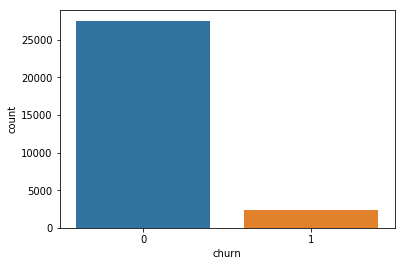

In [35]:
sns.countplot(x='churn', data=tel_hvc)
plt.show()

This is a clear case of class imbalance and definitely needs to be taken care of. We will use the SMOTE technique to handle the class imbalance. 

In [36]:
# create an object using smote to handle the class imbalance by over sampling
smt = SMOTE(random_state=2)

# fitting the object to generate data
tel_hvc_osX, tel_hvc_osy = smt.fit_sample(tel_hvc.drop('churn', axis=1), tel_hvc['churn'])
tel_hvc_os = pd.concat([pd.DataFrame(tel_hvc_osX), pd.DataFrame(tel_hvc_osy)], axis=1)
tel_hvc_os

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,0
0,197.385000,214.816000,213.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,101.200000,252.000000,252.000000,252.000000,614.000000,504.000000,504.000000,559.000000,1
1,1069.180000,1349.850000,3171.480000,57.840000,54.680000,52.290000,453.430000,567.160000,325.910000,16.230000,...,19.380000,18.740000,0.000000,0.000000,0.000000,1580.000000,790.000000,3638.000000,1185.000000,1
2,378.721000,492.223000,137.362000,413.690000,351.030000,35.080000,94.660000,80.630000,136.480000,0.000000,...,910.650000,122.160000,0.000000,354.000000,207.000000,437.000000,955.000000,327.000000,696.000000,0
3,514.453000,597.753000,637.760000,102.410000,132.110000,85.140000,757.930000,896.680000,983.390000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,600.000000,680.000000,718.000000,640.000000,0
4,74.350000,193.897000,366.966000,48.960000,50.660000,33.580000,85.410000,89.360000,205.890000,0.000000,...,51.860000,0.000000,0.000000,712.000000,540.000000,0.000000,1166.000000,979.000000,583.000000,0
5,977.020000,2362.833000,409.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2706.830000,1714.670000,5285.000000,20424.000000,455.000000,6343.000000,23230.000000,910.000000,14786.500000,0
6,363.987000,486.558000,393.909000,248.990000,619.960000,666.380000,88.860000,50.580000,97.810000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,420.000000,636.000000,416.000000,528.000000,0
7,482.832000,425.764000,229.769000,86.390000,118.880000,80.440000,232.360000,280.780000,136.690000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,496.000000,510.000000,410.000000,503.000000,0
8,1873.271000,575.927000,179.218000,2061.690000,881.430000,156.910000,1087.760000,258.290000,68.180000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2317.000000,580.000000,197.000000,1448.500000,0
9,978.077000,1141.296000,706.020000,135.140000,119.590000,102.690000,479.310000,543.180000,261.340000,0.000000,...,0.000000,0.000000,344.000000,575.000000,23.000000,1503.000000,1947.000000,798.000000,1725.000000,0


In [37]:
# putting back the column names
tel_hvc_os.columns = tel_hvc.columns

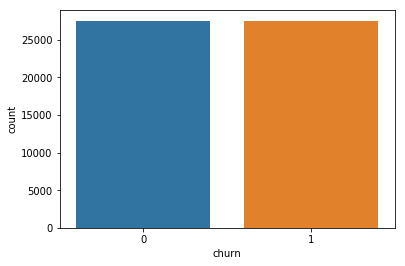

In [38]:
sns.countplot(x='churn', data=tel_hvc_os)
plt.show()

## Outliers' treatment

Let's do the outlier treatment using the z-score function. 

In [39]:
zscr = np.abs(stats.zscore(tel_hvc_os))
print(zscr)

[[0.80749241 0.68182939 0.34629666 ... 0.13713448 0.45032654 1.        ]
 [0.97127772 1.72321071 6.13169572 ... 2.0477051  0.07506036 1.        ]
 [0.43750283 0.09402765 0.51372002 ... 0.26052842 0.33534571 1.        ]
 ...
 [2.65782137 1.55256003 0.29724381 ... 0.30611706 0.78437833 1.        ]
 [0.71057716 0.12102779 0.70634447 ... 0.0854367  0.23382345 1.        ]
 [0.58275033 1.13732172 0.54377697 ... 0.34540623 0.4868313  1.        ]]


In [40]:
tel_hvc_os = tel_hvc_os[(zscr < 3).all(axis=1)]
tel_hvc_os

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,gross_rech_amt_6,gross_rech_amt_7,gross_rech_amt_8,av_rech_amt_good_phase,churn
0,197.385000,214.816000,213.803000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,101.200000,252.000000,252.000000,252.000000,614.000000,504.000000,504.000000,559.000000,1
2,378.721000,492.223000,137.362000,413.690000,351.030000,35.080000,94.660000,80.630000,136.480000,0.000000,...,910.650000,122.160000,0.000000,354.000000,207.000000,437.000000,955.000000,327.000000,696.000000,0
3,514.453000,597.753000,637.760000,102.410000,132.110000,85.140000,757.930000,896.680000,983.390000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,600.000000,680.000000,718.000000,640.000000,0
6,363.987000,486.558000,393.909000,248.990000,619.960000,666.380000,88.860000,50.580000,97.810000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,420.000000,636.000000,416.000000,528.000000,0
14,809.518000,794.775000,33.060000,181.630000,257.060000,0.000000,1608.760000,1585.240000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,986.000000,806.000000,86.000000,896.000000,0
20,465.794000,530.596000,463.903000,178.460000,92.960000,144.810000,373.080000,265.230000,216.240000,0.000000,...,0.000000,0.000000,98.000000,392.000000,392.000000,726.000000,946.000000,898.000000,836.000000,0
27,596.301000,146.073000,0.000000,55.190000,3.260000,0.000000,45.510000,12.340000,0.000000,0.000000,...,0.000000,0.000000,406.000000,0.000000,0.000000,1110.000000,178.000000,0.000000,644.000000,1
32,740.191000,496.027000,480.940000,442.790000,128.480000,57.990000,176.340000,143.390000,20.940000,0.000000,...,522.650000,437.980000,154.000000,608.000000,154.000000,899.000000,1010.000000,758.000000,954.500000,0
34,322.570000,303.773000,380.262000,4.160000,27.580000,25.480000,175.340000,169.110000,304.840000,0.000000,...,106.500000,126.660000,154.000000,608.000000,179.000000,483.000000,1163.000000,488.000000,823.000000,0
40,329.840000,384.343000,416.213000,88.290000,213.730000,222.430000,106.360000,313.180000,321.480000,44.910000,...,0.000000,0.000000,23.000000,575.000000,368.000000,446.000000,1065.000000,834.000000,755.500000,0


## Data Visualization

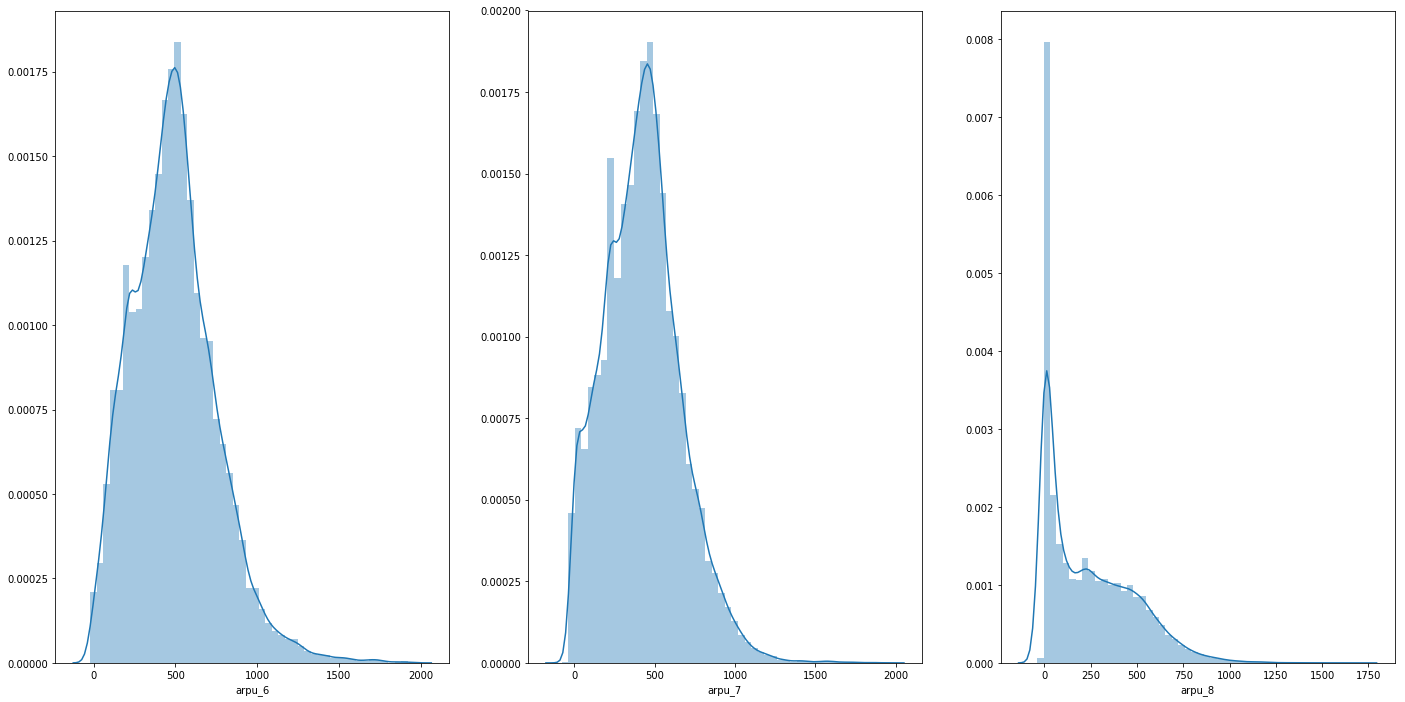

In [41]:
# checking the Average revenue per user for the respective months
plt.figure(figsize=(24, 12))
plt.subplot(1,3,1)
sns.distplot(tel_hvc_os.arpu_6)
plt.subplot(1,3,2)
sns.distplot(tel_hvc_os.arpu_7)
plt.subplot(1,3,3)
sns.distplot(tel_hvc_os.arpu_8)


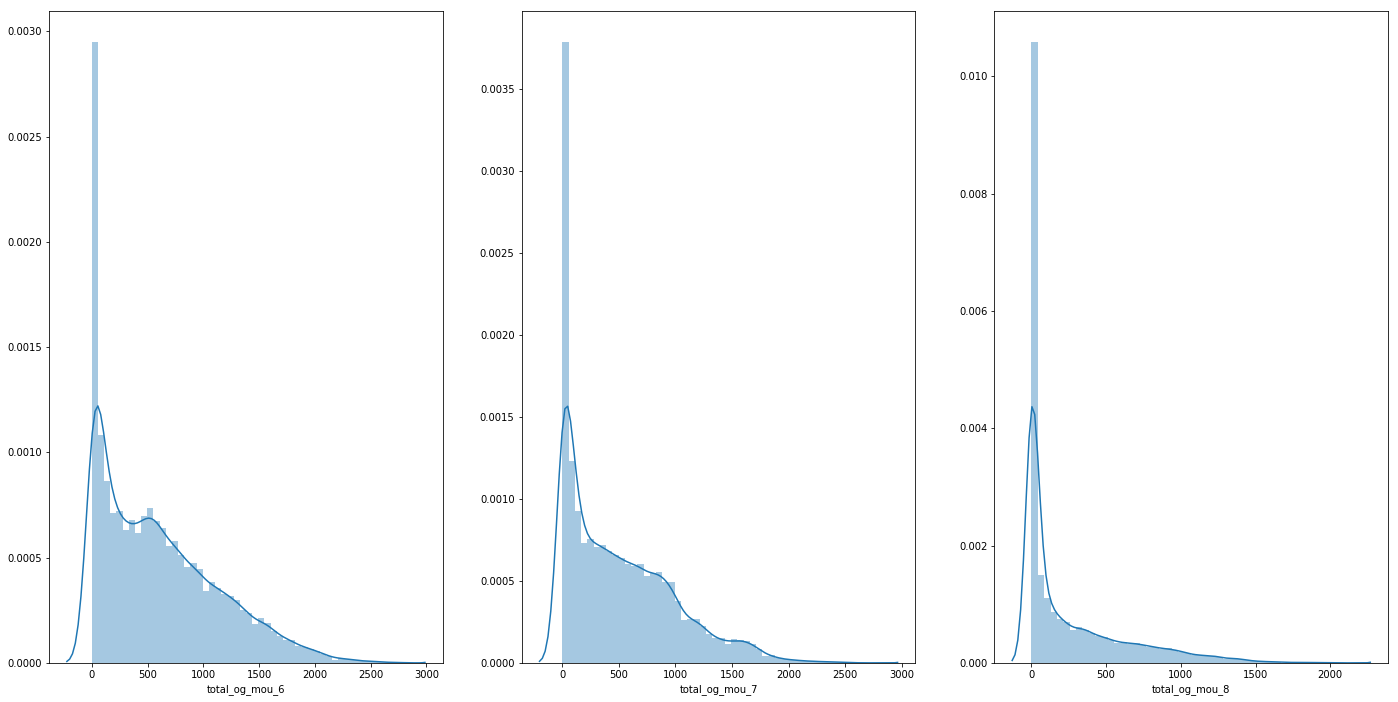

In [42]:
# checking the total outgoing mou
plt.figure(figsize=(24, 12))
plt.subplot(1,3,1)
sns.distplot(tel_hvc_os.total_og_mou_6)
plt.subplot(1,3,2)
sns.distplot(tel_hvc_os.total_og_mou_7)
plt.subplot(1,3,3)
sns.distplot(tel_hvc_os.total_og_mou_8)

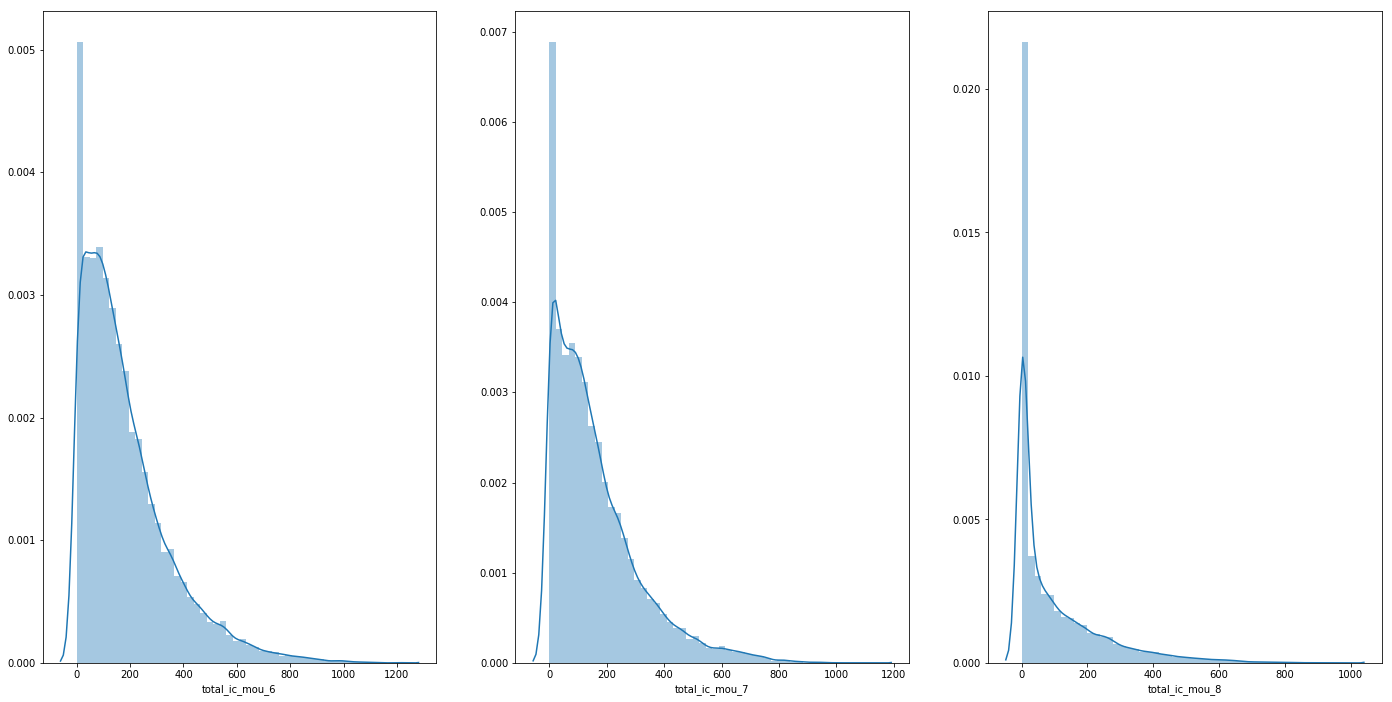

In [43]:
# checking the total outgoing mou
plt.figure(figsize=(24, 12))
plt.subplot(1,3,1)
sns.distplot(tel_hvc_os.total_ic_mou_6)
plt.subplot(1,3,2)
sns.distplot(tel_hvc_os.total_ic_mou_7)
plt.subplot(1,3,3)
sns.distplot(tel_hvc_os.total_ic_mou_8)

It is clearly visible from the above plots the difference between the **Good phase** and the **Action phase**.

## Test-Train split

Starting with the train-test split of the final dataset.

In [44]:
from sklearn.model_selection import train_test_split

tel_X = tel_hvc_os.drop(['churn'], axis=1)
tel_y = tel_hvc_os['churn']

tel_train_X, tel_test_X, tel_train_y, tel_test_y = train_test_split(tel_X, tel_y, train_size=0.7, test_size=0.3, random_state=100)

## PCA 

In [45]:
# import the PCA from library
from sklearn.decomposition import PCA
tel_pca = PCA(svd_solver='randomized', random_state=44)

In [46]:
# applying PCA on the training data
tel_pca.fit(tel_train_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=44,
  svd_solver='randomized', tol=0.0, whiten=False)

In [47]:
tel_pca.components_

array([[ 1.18585996e-01,  1.17802404e-01,  5.73605235e-02, ...,
        -1.61640348e-03,  2.20352172e-02, -1.14004172e-02],
       [-9.50674448e-03,  9.75464671e-02,  1.67001867e-01, ...,
         1.46213760e-01,  2.46095381e-01,  2.52744670e-02],
       [-1.48968394e-01,  1.03770853e-01,  1.29550995e-01, ...,
         3.72409645e-01,  2.34073214e-01,  9.54180010e-02],
       ...,
       [ 0.00000000e+00,  2.85776589e-18,  6.20594700e-19, ...,
         2.70587846e-04, -2.90885799e-05, -4.32017540e-04],
       [-0.00000000e+00,  1.61362083e-18,  7.70945764e-19, ...,
        -5.83706008e-04, -1.16385588e-04,  7.86875137e-04],
       [-0.00000000e+00,  1.74717346e-18,  2.52681379e-18, ...,
        -3.85640433e-04, -7.21817886e-05,  6.54587222e-04]])

In [48]:
# fetching first two PCs into a df
cols = list(tel_train_X.columns)
pca_df = pd.DataFrame({'PC1':tel_pca.components_[0],'PC2':tel_pca.components_[1], 'Feature':cols})
pca_df.head()

,PC1,PC2,Feature
0,0.118586,-0.009507,arpu_6
1,0.117802,0.097546,arpu_7
2,0.057361,0.167002,arpu_8
3,0.200144,-0.042758,onnet_mou_6
4,0.173506,0.021898,onnet_mou_7


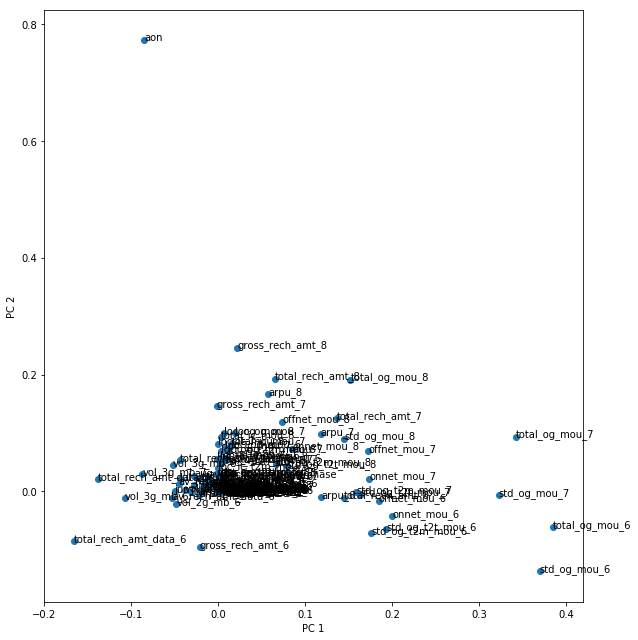

In [49]:
# plotting the first two PCs
%matplotlib inline
fig = plt.figure(figsize = (9,9))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for l, text in enumerate(pca_df.Feature):
    plt.annotate(text, (pca_df.PC1[l],pca_df.PC2[l]))
plt.tight_layout()
plt.show()

In [50]:
# checking the explained variance ratio
tel_pca.explained_variance_ratio_

array([2.83730442e-01, 1.57085852e-01, 1.06252465e-01, 8.24563627e-02,
       7.73980343e-02, 5.99845757e-02, 4.41369812e-02, 3.62850919e-02,
       2.88011381e-02, 1.80122812e-02, 1.61577088e-02, 1.06641020e-02,
       8.20544811e-03, 7.64320541e-03, 6.82076506e-03, 5.79384785e-03,
       5.51523414e-03, 5.04486190e-03, 4.74198698e-03, 4.41352148e-03,
       3.59547191e-03, 2.73142128e-03, 2.63903092e-03, 2.12355393e-03,
       1.99143900e-03, 1.43034299e-03, 1.32541277e-03, 1.30929926e-03,
       1.09102625e-03, 1.06677773e-03, 9.58504952e-04, 8.88303207e-04,
       8.52484539e-04, 7.07337348e-04, 6.71085200e-04, 5.76214217e-04,
       5.46513904e-04, 5.09437090e-04, 4.91437243e-04, 4.63555646e-04,
       4.44283846e-04, 4.31153263e-04, 3.78733460e-04, 3.51028845e-04,
       3.08811146e-04, 2.76529568e-04, 2.57684480e-04, 2.45374248e-04,
       2.26136349e-04, 2.11158405e-04, 1.98031212e-04, 1.66892840e-04,
       1.43420439e-04, 1.26201241e-04, 1.21174316e-04, 1.09855819e-04,
      

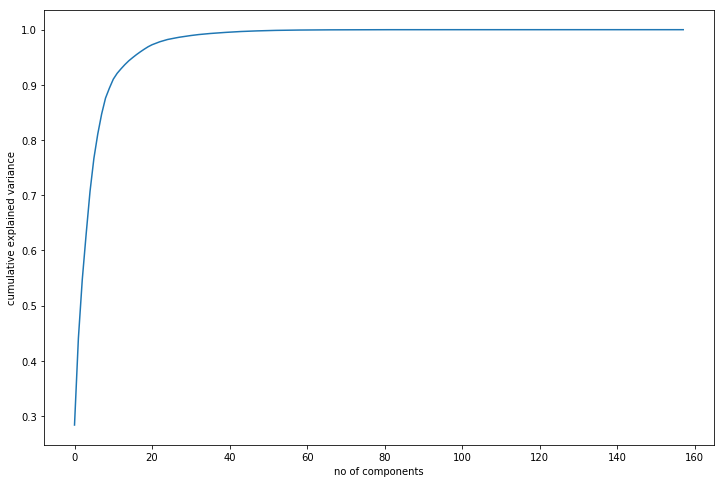

In [51]:
# plotting the screeplot using the cumulative variance for the no of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(tel_pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.show()

So, 20 components should be enough to describe 96-97% of variance in the dataset

In [52]:
# using the incremental PCA to fetch final set of features
from sklearn.decomposition import IncrementalPCA
tel_pca_final = IncrementalPCA(n_components=20)

In [53]:
# transforming our train data to fit the PCs
tel_train_pca = tel_pca_final.fit_transform(tel_train_X)
tel_train_pca.shape

(16559, 20)

In [54]:
# transforming our test data to fit the PCs
tel_test_pca = tel_pca_final.fit_transform(tel_test_X)
tel_test_pca.shape

(7098, 20)

## Logistic Regression on PCs

In [55]:
# Training the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logit_pca = LogisticRegression()
tel_model_pca = logit_pca.fit(tel_train_pca, tel_train_y)

In [56]:
# predicting the test data
pred_prob_test = tel_model_pca.predict_proba(tel_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(tel_test_y, pred_prob_test))

'0.86'

**Awesome! 0.86 is a good enough AUC score**.

## Random Forest

Let's start with fitting a RF model with default hyperparameters.

In [57]:
# Importing rf classifier
from sklearn.ensemble import RandomForestClassifier

# Running the model with default parameters.
tel_rfc = RandomForestClassifier()

In [58]:
# fitting the model to the training data
tel_rfc.fit(tel_train_X, tel_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
# make predictions
pred_default = tel_rfc.predict(tel_test_X)

In [60]:
# Import classification report and confusion matrix to check the report
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(tel_test_y, pred_default))

             precision    recall  f1-score   support

          0       0.94      0.93      0.93      2879
          1       0.95      0.96      0.96      4219

avg / total       0.95      0.95      0.95      7098



In [61]:
# check confusion matrix and accuracy score
print(confusion_matrix(tel_test_y, pred_default))
print(accuracy_score(tel_test_y, pred_default))

[[2677  202]
 [ 175 4044]]
0.9468864468864469


This is an extraordinary result, just by using the default hyperparameters, but seeing this the other way around default hyperparameters is the reason for this enormously good accuracy; let;s tune some hyperparameters.

## Hyperparameter tuning 

We will use the Grid Search Cross Validation technique to figure out the optimum values of the hyperparameters.

### max_depth parameter tuning

In [62]:
# importing the libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5                              # no of folds for CV
param = {'max_depth': range(2, 20, 5)}   # parameter for the model

rfc1 = RandomForestClassifier()          # model object

# fitting the model on the train data
rfc1 = GridSearchCV(rfc1, param, cv=n_folds, scoring="accuracy")
rfc1.fit(tel_train_X, tel_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [63]:
# checking the score for the GS-CV
score_md = rfc1.cv_results_
pd.DataFrame(score_md).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.388425,0.123032,0.009425,0.002340,2,{'max_depth': 2},0.797101,0.820350,0.801027,0.826087,...,0.816474,0.015340,4,0.809089,0.820639,0.800030,0.831509,0.831824,0.818618,0.012498
1,0.864899,0.044406,0.017885,0.011208,7,{'max_depth': 7},0.905495,0.918478,0.911836,0.919082,...,0.915273,0.005842,3,0.935684,0.933343,0.931834,0.932589,0.933726,0.933435,0.001298
2,1.353218,0.069122,0.016396,0.001629,12,{'max_depth': 12},0.936292,0.942029,0.945350,0.937198,...,0.940999,0.003643,2,0.978561,0.975089,0.977882,0.979014,0.976374,0.977384,0.001455
3,1.503520,0.051860,0.018956,0.004320,17,{'max_depth': 17},0.945350,0.947464,0.946860,0.941727,...,0.944683,0.002400,1,0.990111,0.990035,0.990035,0.988450,0.987998,0.989326,0.000911


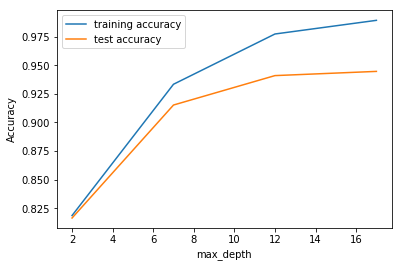

In [64]:
# plotting accuracies
plt.figure()
plt.plot(score_md["param_max_depth"], score_md["mean_train_score"], label="training accuracy")
plt.plot(score_md["param_max_depth"], score_md["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Therefore to avoid the overfitting it's better to keep the `max_depth` low, this should be somewhere between 8 to 12.

### max_features parameter tuning

In [65]:
# importing the libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5                                # no of folds for CV
param = {'max_features': [4,8,12,16,20]}   # parameter for the model

rfc2 = RandomForestClassifier(max_depth=4) # model object

# fitting the model on the train data
rfc2 = GridSearchCV(rfc2, param, cv=n_folds, scoring="accuracy")
rfc2.fit(tel_train_X, tel_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
# checking the score for the GS-CV
score_mf = rfc2.cv_results_
pd.DataFrame(score_mf).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.302405,0.045821,0.013042,0.002109,4,{'max_features': 4},0.848430,0.856582,0.877415,0.866848,...,0.859412,0.011343,5,0.851816,0.864498,0.879595,0.873254,0.848505,0.863534,0.011971
1,0.391908,0.037082,0.007834,0.004084,8,{'max_features': 8},0.884964,0.873792,0.860205,0.878321,...,0.874630,0.008133,4,0.885408,0.880275,0.865102,0.881634,0.875830,0.877650,0.006982
2,0.513167,0.021761,0.009833,0.001170,12,{'max_features': 12},0.869263,0.882548,0.893720,0.881643,...,0.882360,0.007827,3,0.883747,0.882539,0.892127,0.882766,0.886096,0.885455,0.003566
3,0.658348,0.023135,0.009239,0.000410,16,{'max_features': 16},0.885266,0.891606,0.883756,0.892210,...,0.888399,0.003369,1,0.891070,0.893485,0.890617,0.893938,0.891455,0.892113,0.001340
4,0.829476,0.050446,0.007330,0.003670,20,{'max_features': 20},0.887379,0.878925,0.883756,0.888587,...,0.886889,0.005582,2,0.895071,0.887295,0.889333,0.894467,0.897569,0.892747,0.003821


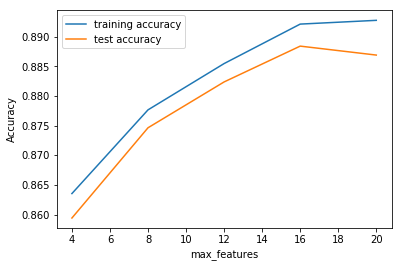

In [67]:
# plotting accuracies
plt.figure()
plt.plot(score_mf["param_max_features"], score_mf["mean_train_score"], label="training accuracy")
plt.plot(score_mf["param_max_features"], score_mf["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

So the accuracy is increasing with the increasing number of features.

### min_samples_leaf parameter tuning

In [68]:
# importing the libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# setting up the values
n_folds = 5                                         # no of folds for CV
param = {'min_samples_leaf': range(100, 400, 50)}   # parameter for the model

rfc3 = RandomForestClassifier()                     # model object

# fitting the model on the train data
rfc3 = GridSearchCV(rfc3, param, cv=n_folds, scoring="accuracy")
rfc3.fit(tel_train_X, tel_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
# checking the score for the GS-CV
score_msl = rfc3.cv_results_
pd.DataFrame(score_msl).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.921527,0.178724,0.013464,0.001863,100,{'min_samples_leaf': 100},0.889795,0.892814,0.901268,0.890700,...,0.894861,0.004731,1,0.904129,0.899826,0.905413,0.898770,0.903457,0.902319,0.002567
1,0.830094,0.088399,0.012961,0.001652,150,{'min_samples_leaf': 150},0.886775,0.900362,0.873490,0.887379,...,0.886829,0.008507,2,0.894844,0.899600,0.880124,0.889560,0.891984,0.891222,0.006478
2,0.701083,0.026909,0.012049,0.001563,200,{'min_samples_leaf': 200},0.882548,0.888889,0.874094,0.884058,...,0.883991,0.005739,3,0.891447,0.888654,0.881105,0.890994,0.886398,0.887720,0.003768
3,0.629877,0.019602,0.011237,0.001169,250,{'min_samples_leaf': 250},0.869565,0.891304,0.878019,0.886171,...,0.879703,0.008014,4,0.880803,0.887899,0.883747,0.889786,0.873868,0.883221,0.005632
4,0.591346,0.026830,0.008629,0.004468,300,{'min_samples_leaf': 300},0.868056,0.879227,0.880435,0.873792,...,0.875778,0.004466,5,0.876802,0.880275,0.883747,0.881860,0.875906,0.879718,0.002972


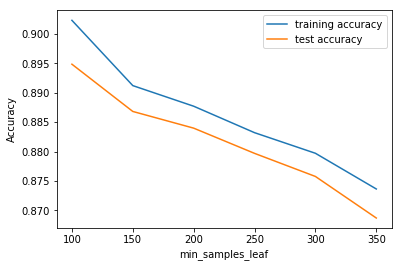

In [70]:
# plotting accuracies
plt.figure()
plt.plot(score_msl["param_min_samples_leaf"], score_msl["mean_train_score"], label="training accuracy")
plt.plot(score_msl["param_min_samples_leaf"], score_msl["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Clearly, too low value for **min_samples_leaf** is leading to the overfitting.

### min_samples_split parameter tuning

In [71]:
# importing the libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# setting up the values
n_folds = 5                                          # no of folds for CV
param = {'min_samples_split': range(200, 500, 50)}   # parameter for the model

rfc4 = RandomForestClassifier()                      # model object

# fitting the model on the train data
rfc4 = GridSearchCV(rfc4, param, cv=n_folds, scoring="accuracy")
rfc4.fit(tel_train_X, tel_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [72]:
# checking the score for the GS-CV
score_mss = rfc4.cv_results_
pd.DataFrame(score_mss).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.526811,0.091920,0.014831,0.001466,200,{'min_samples_split': 200},0.909722,0.913345,0.907307,0.908213,...,0.910079,0.002234,1,0.928210,0.924360,0.917793,0.919680,0.923083,0.922625,0.003645
1,1.454734,0.164094,0.011229,0.005722,250,{'min_samples_split': 250},0.897947,0.909722,0.904891,0.898551,...,0.902772,0.004334,2,0.918623,0.914849,0.913867,0.910621,0.914025,0.914397,0.002559
2,1.379440,0.098319,0.013436,0.000801,300,{'min_samples_split': 300},0.898249,0.903986,0.903382,0.898853,...,0.901564,0.002478,3,0.912735,0.910999,0.910395,0.910999,0.908439,0.910713,0.001380
3,1.477317,0.164146,0.014437,0.001859,350,{'min_samples_split': 350},0.890097,0.903080,0.900362,0.895833,...,0.896854,0.004508,4,0.903148,0.905790,0.909791,0.905488,0.903835,0.905610,0.002313
4,1.363190,0.180740,0.014439,0.002879,400,{'min_samples_split': 400},0.890097,0.896135,0.896437,0.891002,...,0.893230,0.002610,5,0.905790,0.902997,0.903827,0.904658,0.903533,0.904161,0.000976


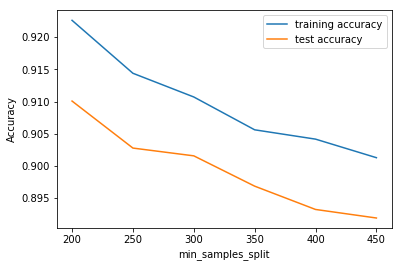

In [73]:
# plotting accuracies
plt.figure()
plt.plot(score_mss["param_min_samples_split"], score_mss["mean_train_score"], label="training accuracy")
plt.plot(score_mss["param_min_samples_split"], score_mss["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Let's finally find the optimum set of hyperparameters. 

In [74]:
# Creating the parameter grid based on the results above
par_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,200,300], 
    'max_features': [5, 10, 15]
}

# Creating models
rfc = RandomForestClassifier()
gsm = GridSearchCV(estimator = rfc, param_grid = par_grid, cv = 3, n_jobs = -1, verbose = 1)

In [75]:
# Fitting the grid-search model to the training data
gsm.fit(tel_train_X, tel_train_y)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 31.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [8, 10, 12], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 100), 'n_estimators': [100, 200, 300], 'max_features': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [77]:
# print the accuracy score and optimal hyperparams
print('Acuracy Score: ', gsm.best_score_, '\nOptimum hyperparameters: \n', gsm.best_params_)

Acuracy Score:  0.8995108400265717 
Optimum hyperparameters: 
 {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


Let's fit the achieved parameters with the model now.

In [78]:
# final model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, 
                             max_depth=10, 
                             min_samples_leaf=100, 
                             min_samples_split=200, 
                             max_features=15, 
                             n_estimators=200)

In [79]:
# fit the model
rfc.fit(tel_train_X, tel_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
# make the predictions on the test set
pred_rf_final = rfc.predict(tel_test_X)

In [83]:
# importing evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(tel_test_y, pred_rf_final))
print('\nConfusion Matrics: \n')
print(confusion_matrix(tel_test_y,pred_rf_final))

             precision    recall  f1-score   support

          0       0.89      0.85      0.87      2879
          1       0.90      0.93      0.92      4219

avg / total       0.90      0.90      0.90      7098


Confusion Matrics: 

[[2461  418]
 [ 306 3913]]


**Therefore we can clearly see the difference in the Accuracy score using the two methods, while the `Logistic Regression` gave us a model with the accuracy score of `0.86` on the other hand the `Random Forest` derived a model with an accuracy score of `0.8995`.**

## Conclusion

* Looking at the data we could clearly see that while the Average revenue per user was centred around 500 during the Good Phase, it suddenly fell down to 200 in the Action month.
* Same goes with the total minutes of usage for outgoing and incoming calls, both fell considerably low in the action month.
